# Assignment 5 - 70 points possible

## Apple, Bird, Cookie:
## Data from Google's Quick, Draw!  Game

We will perform 2 tasks in this homework.  The first is to build a classifier that can tell whether a drawing is of an apple, a bird, or a cookie.  The data is taken from a game you can play online, developed by Google, called Quick, Draw!  The drawings are all Pictionary-style quick sketches of things.  Google has already done the work of turning the drawings into grayscale 28 x 28 images that are good for machine learning.  Since the images don't have that many pixels, the drawings are simplified, and there is a lot of data, this is an example of a relatively easy task for machine learning generally and neural networks in particular.  (There are many similar datasets here:  https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?pli=1&prefix=&forceOnObjectsSortingFiltering=false)

Before you do anything else in this assignment, it's *strongly recommended* that you do two things with your Google Colab setup.  First, go to the upper right and select "Connect to a hosted runtime."  Second, go to the menu at the top and select Runtime->Change runtime type->Pick GPU.  Selecting "GPU" will dramatically speed up the training times for the neural networks in this assignment.  But, picking GPU also resets the runtime, which is why you should do this before anything else.

Download the two zip files associated with this homework at https://drive.google.com/file/d/14ZkNqKC34mUW5yUa6WjYWf1R-CempaoB/view?usp=sharing and https://drive.google.com/file/d/14UmGyFC_WSywNcm2yrCfe0x04IuA42O8/view?usp=sharing and place them in your own Google Drive.  Then run the code boxes below (possibly modifying the path) to mount the drive and unzip the files.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# You may need to change "NNAssign" to your own directory name
!unzip gdrive/MyDrive/'Junior Year'/'DS 340'/'HW 5'/apple_bird_cookie.zip

Archive:  gdrive/MyDrive/Junior Year/DS 340/HW 5/apple_bird_cookie.zip
  inflating: full_numpy_bitmap_apple.npy  
  inflating: __MACOSX/._full_numpy_bitmap_apple.npy  
  inflating: full_numpy_bitmap_bird.npy  
  inflating: __MACOSX/._full_numpy_bitmap_bird.npy  
  inflating: full_numpy_bitmap_cookie.npy  
  inflating: __MACOSX/._full_numpy_bitmap_cookie.npy  


In [3]:
import numpy as np

apples = np.load('full_numpy_bitmap_apple.npy')
birds = np.load('full_numpy_bitmap_bird.npy')
cookies = np.load('full_numpy_bitmap_cookie.npy')

(1, 2pts) Call np.concatenate to join the three datasets together into a single array called "all_kinds".  Notice that the three datasets should be passed to np.concatenate as a tuple.


In [4]:
# TODO concatenate the data
all_kinds = np.concatenate((apples, birds, cookies))

(2, 3 pts) Now we need a list of labels that is as long as all_kinds.  Create a list named "labels" that is as long as all_kinds, where each element identifies which kind of drawing can be found at that place in all_kinds.  Label apples as 0, birds as 1, and cookies as 2.  (You may find it useful to call len() on the apples, birds, and cookies arrays.)

In [5]:
# TODO make labels
labels = [0] * len(apples) + [1] * len(birds) + [2] * len(cookies)

Now we'll call train_test_split to separate the data into training and testing data.

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_kinds, labels)

(3, 2pts) This data ranges from 0 to 255, but neural networks tend to work best when the data is between 0 and 1.
Scale the train and test data by dividing it by 255.

In [7]:
# TODO scale the data
print(x_train.shape)
x_train = x_train/255
x_test = x_test/255

(307235, 784)


(4, 5pts) If we examine the shape of x, it isn't quite what we want yet - it is an array of arrays that are of size length-of-data x 784.  784 is 28x28, and we want our convolutional neural networks to perceive the data as a 28x28 square instead of one long array of 784 elements.  Call x_train.reshape() and x_test.reshape() so that their dimensions are length-of-data x 28 x 28.  (Note that reshape expects a tuple that is the size as its argument.  You can pass -1 as one of the dimensions if you don't want to figure out how long the array is.)

In [8]:
x_train[0].shape

(784,)

In [9]:
# TODO reshape x_train
x_train = x_train.reshape((-1, 28,28))

In [10]:
# TODO reshape x_test
x_test = x_test.reshape((-1, 28, 28))

If your reshape worked correctly, the following code should show a apple, bird, or cookie sketch.  If it didn't work, it will look like random noise.  If you're not sure, you can always try more images.

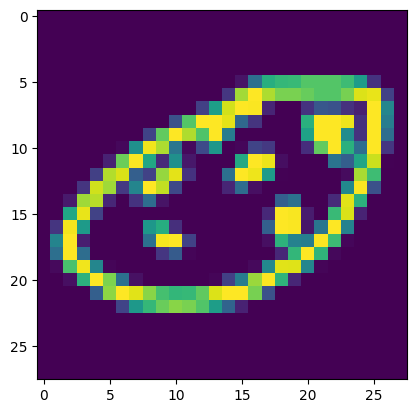

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # Should be a recognizable image if we reshaped correctly

As the last step before creating the neural network, we will turn the labels into one-hot encodings, like [0,0,1] instead of 2.  There's a handy keras function that does this, and we're just going to call it for you.

In [12]:
from tensorflow import keras
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(5, 9pts) Rather than create a network completely from scratch, it makes sense to start with a network that you know does something similar.  One of the keras tutorials shows how to do digit recognition with a relatively small deep neural network.  The dataset, the MNIST digit dataset, is very similar to ours because it consists of 28 x 28 black and white line drawings.  Consult the "Build a Model" and "Train the model" sections of https://keras.io/examples/vision/mnist_convnet/ and get that neural network running on our apple, bird, and cookie data.  (Be sure to leave a comment indicating that you borrowed the structure from there.)


In [15]:
from tensorflow.keras import layers
input_shape = (28,28,1)
batch_size = 128
epochs = 15

In [14]:
# TODO borrow the MNIST model with attribution
# model architecture from fchollet
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [16]:
# TODO compile and fit the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
2161/2161 [==============================] - 24s 6ms/step - loss: 0.1320 - accuracy: 0.9589 - val_loss: 0.0872 - val_accuracy: 0.9719
Epoch 2/15
2161/2161 [==============================] - 11s 5ms/step - loss: 0.0852 - accuracy: 0.9728 - val_loss: 0.0703 - val_accuracy: 0.9773
Epoch 3/15
2161/2161 [==============================] - 12s 5ms/step - loss: 0.0738 - accuracy: 0.9764 - val_loss: 0.0641 - val_accuracy: 0.9789
Epoch 4/15
2161/2161 [==============================] - 12s 5ms/step - loss: 0.0687 - accuracy: 0.9777 - val_loss: 0.0601 - val_accuracy: 0.9797
Epoch 5/15
2161/2161 [==============================] - 13s 6ms/step - loss: 0.0652 - accuracy: 0.9789 - val_loss: 0.0591 - val_accuracy: 0.9803
Epoch 6/15
2161/2161 [==============================] - 12s 5ms/step - loss: 0.0619 - accuracy: 0.9798 - val_loss: 0.0569 - val_accuracy: 0.9813
Epoch 7/15
2161/2161 [==============================] - 13s 6ms/step - loss: 0.0600 - accuracy: 0.9801 - val_loss: 0.0557 - val_ac

(6, 2pts) Evaluate the model on the test set with the code below.  You should have a test accuracy well above 90%.

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.047915734350681305
Test accuracy: 0.9842401146888733


## Cats and Dogs

It was relatively easy to get good performance on that task, because the size of each input is small and the features needed for success weren't too complicated.  We'll now try a classification task with real images.  This is a moderately well-known "cats and dogs" dataset.  Unzip the dogs-vs-cats dataset in the current directory.  You can examine the files to see pictures of cats and dogs with varying dimensions and varying poses.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!unzip gdrive/MyDrive/NNAssign/dogs-vs-cats.zip

In [ ]:
!ls

In [ ]:
import tensorflow as tf
image_size = (180, 180)
batch_size = 32
# Data from https://www.kaggle.com/competitions/dogs-vs-cats/
# Code from https://keras.io/examples/vision/image_classification_from_scratch/
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

(7, 9pts) We'll suppose that the closest starting point network we have on hand for this is the MNIST network again.  Adapt it to this dataset with the following changes:

* The input shape is 180 x 180 x 3.
* Put the rescaling of dividing values by 255 in the network itself with a layers.Rescaling() layer after the Input layer.  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
* The final "softmax" activation function is only appropriate for multiclass classification.  Change this to a more appropriate activation function for binary classification.
* Name the model model2 to work with the training code below.

In [ ]:
# TODO create model2

You can train the network using the following code.

In [ ]:
epochs = 15

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(train_ds, epochs=epochs, validation_data=val_ds) # Validation data instead of fraction

(8, 6pts) The validation loss went down and then up, indicating overfitting, so we possibly could proceed to regularization steps at this point; nevertheless, for photos, we probably want to try some deeper architectures than for the hand drawings.  Probably, the features extracted for the MNIST and apple/bird/cookie datasets are simpler than what's necessary for photos.  This implies needing more layers.  One strategy used by some well-known networks is to add blocks each consisting of a Conv2D layer followed by MaxPooling2D layer, where each Conv2D layer has twice as many filters as the last one (so 32, 64, 128 ...).  You can see our current architecture already follows this pattern.  Try training networks with one, two, and three more of these blocks between the last MaxPooling2D layer and the Flatten() call.

In [ ]:
# TODO define model3 with one more block of Conv2D and pooling

In [ ]:
epochs = 15

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.fit(train_ds, epochs=epochs, validation_data=val_ds)

In [ ]:
# TODO define model4 with two more blocks of Conv2D and pooling

In [ ]:
epochs = 15

model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model4.fit(train_ds, epochs=epochs, validation_data=val_ds)

In [ ]:
# TODO model5 with three more blocks of Conv2D and pooling

In [ ]:
epochs = 15

model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model5.fit(train_ds, epochs=epochs, validation_data=val_ds)

(9, 6pts) Architecture search could continue all day, but let's take a different approach to improving the network further.  When the accuracy on the training data is higher than the validation accuracy, this is evidence of overfitting.  Two approaches to handling overfitting are:

* More dropout.  We have one big layer of dropout, but we could have one or more additional layers of Dropout(0.2).
* Data augmentation.  If the dataset is randomly rotated and flipped, this encourages features that are robust against these transformations, and it makes it harder to overfit the data.  We can work this into the pipeline itself with layers.RandomFlip("horizontal") and layers.RandomRotation(0.1).

Train a new network with these two ideas worked into your best architecture so far.  (Your best architecture is the one that you achieved the highest validation accuracy on.)  The dropout locations are up to you.  Use 20 epochs instead of 15, since these methods slow down the learning somewhat.

In [ ]:
# TODO model6 with data augmentation and some extra dropout

In [ ]:
epochs = 20

model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model6.fit(train_ds, epochs=epochs, validation_data=val_ds)

(10, 7pts) Rather than building a model from nearly scratch, a different approach ("transfer learning") is to take an existing model that did something similar, including its trained weights, and retrain only a few layers at the very end of the model, keeping the rest of the model "frozen."  This allows complex features learned from a lot of data to be used on smaller problems with less data, and it saves on training time as well.

You can base your code on the transfer learning example provided in lecture.  (Note that since this is a binary classification problem instead of multiclass, you will need to change the final layer's activation function and the loss function.)  You should keep the "adam" optimizer we've been using all along.  You should only need to train to 7 epochs.

In [ ]:
# TODO:  define model7 using transfer learning
model7.fit(train_ds, epochs=7,validation_data=val_ds)

(11, 19pts) Last, answer these questions.

(a, 6 pts) Suppose we have a small perceptron with 3 inputs, no hidden units, and one output unit.  The 2 inputs represent car attributes:  cost (normalized to [0,1]), and mileage on the car (normalized to [0,1]).  Assume the input neurons have no activation functions.  Can this tiny network learn the rule, “fire if cost < 0.5, or mileage < 0.5”?  If so, specify the weights in the network.  If not, describe the smallest network you can that can effectively represent this rule (assuming the inputs still don’t have activation functions and the output neuron’s activation function is a step function) - give specific weights that would work.

**TODO**

(b, 3pts) Give values for a 3x3 convolutional filter that would plausibly detect small X’s in the image - the meeting of two diagonal lines. Assume the lines are both white or both black (your choice).

**TODO**

(c, 3pts) Transfer learning is effective, and it's more effective the more similar the original task was to the present one.  Skim the Wikipedia page on ImageNet, the dataset used to train VGG-16 (and maybe follow up by searching this subset of ImageNet's classes: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Is there reason to think transfer learning with VGG-16 might be particularly effective for classifying cats and dogs?

**TODO**

(d, 3pts) Suppose we introduce a new activation function in all the neurons in our neural network, g(x) = sin(x). We then notice vanishing gradient problems. What are some values of x that would be particularly problematic for this function in backpropagation?

**TODO**

(e, 4pts) A museum wants to train a neural network to identify plants, using museum plant specimens. In some cases they only have one example of a species, though, making a train/test split difficult.  They decide to use data augmentation in these cases, putting most of the augmented images in the training set with the original image, but also putting a few augmented images in the test set in each case.  Will this classifier have good performance "in the wild" on these species?  Why or why not?  Would we get better performance if we just trained on the unaugmented, single image?

**TODO**

**When you're done, use "File->Download .ipynb" and upload your .ipynb file to Blackboard, along with a PDF version (File->Print->Save as PDF) of your assignment.**